In [ ]:
 # importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1frVuOBo8-C-K4tH1MiPubZIJk0S284MD'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [ ]:
id='17ZqNOr1xUxh7v9WKXuzoVcv4L78A5Na8'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [ ]:
train_labels = pd.read_csv('train_labels.csv')

In [ ]:
test_values = pd.read_csv('test_values.csv', dtype= {'land_surface_condition':'category','foundation_type':'category','roof_type':'category','ground_floor_type':'category' \
, 'other_floor_type':'category', 'position':'category','plan_configuration':'category','damage_grade':'category','legal_ownership_status':'category','has_secondary_use':'int8'\
,'has_superstructure_adobe_mud': 'int8'\
, 'has_superstructure_mud_mortar_stone': 'int8','has_superstructure_stone_flag': 'int8','has_superstructure_cement_mortar_stone': 'int8','has_superstructure_mud_mortar_brick': 'int8'\
, 'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8', 'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8', 'has_superstructure_rc_engineered': 'int8'\
, 'has_superstructure_other': 'int8', 'has_secondary_use': 'int8', 'has_secondary_use_agriculture': 'int8', 'has_secondary_use_hotel': 'int8', 'has_secondary_use_rental': 'int8', 'has_secondary_use_institution': 'int8'\
, 'has_secondary_use_school': 'int8', 'has_secondary_use_industry': 'int8', 'has_secondary_use_health_post': 'int8', 'has_secondary_use_gov_office': 'int8', 'has_secondary_use_use_police': 'int8', 'has_secondary_use_other': 'int8'})

In [ ]:
train_values = pd.read_csv('train_values.csv', dtype= {'land_surface_condition':'category','foundation_type':'category','roof_type':'category','ground_floor_type':'category' \
, 'other_floor_type':'category', 'position':'category','plan_configuration':'category','damage_grade':'category','legal_ownership_status':'category','has_secondary_use':'int8'\
,'has_superstructure_adobe_mud': 'int8'\
, 'has_superstructure_mud_mortar_stone': 'int8','has_superstructure_stone_flag': 'int8','has_superstructure_cement_mortar_stone': 'int8','has_superstructure_mud_mortar_brick': 'int8'\
, 'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8', 'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8', 'has_superstructure_rc_engineered': 'int8'\
, 'has_superstructure_other': 'int8', 'has_secondary_use': 'int8', 'has_secondary_use_agriculture': 'int8', 'has_secondary_use_hotel': 'int8', 'has_secondary_use_rental': 'int8', 'has_secondary_use_institution': 'int8'\
, 'has_secondary_use_school': 'int8', 'has_secondary_use_industry': 'int8', 'has_secondary_use_health_post': 'int8', 'has_secondary_use_gov_office': 'int8', 'has_secondary_use_use_police': 'int8', 'has_secondary_use_other': 'int8'})


In [ ]:
train_values.set_index("building_id", inplace=True)
train_labels.set_index("building_id", inplace=True)
test_values.set_index("building_id", inplace=True)

#encodeo de datos categoricos

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.7 MB/s 


In [ ]:
import category_encoders as ce
categoricals = ["land_surface_condition", "foundation_type", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status" ]
#legal ownership status la sacamos, no?

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Binary Encoding

In [ ]:
encoder = ce.BinaryEncoder(cols=categoricals, return_df=True)
categoricals_encoded = encoder.fit_transform(train_values[categoricals])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
categoricals_encoded.head()

,land_surface_condition_0,land_surface_condition_1,land_surface_condition_2,foundation_type_0,foundation_type_1,foundation_type_2,foundation_type_3,roof_type_0,roof_type_1,roof_type_2,ground_floor_type_0,ground_floor_type_1,ground_floor_type_2,ground_floor_type_3,other_floor_type_0,other_floor_type_1,other_floor_type_2,position_0,position_1,position_2,plan_configuration_0,plan_configuration_1,plan_configuration_2,plan_configuration_3,plan_configuration_4,legal_ownership_status_0,legal_ownership_status_1,legal_ownership_status_2
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
28830,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
94947,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
590882,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
201944,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1


los features estilo `has_secondary_use...` y `has_superstructure...` podrian considerarse como todos un mismo fieature estilo categórico que ya fue encodeado como *One hot Encoding*.  
Podriamos eso encodearlo como Binary encoding y seguramente usar menos columnas/dimensiones.

...Salvo que un mismo edificio puede tener mas de una al mismo tiempo. Habria que ver si igual se puede hacer teniendo alguna salvedad.



En una primer pasada, podemos obviar las distintas posibilidades de secondary use o superstructure y tomarlos todos como una misma cosa  
(o sea, si tiene superstructure o no; si tiene secondary use o no.)

In [ ]:
for col in categoricals:
  del train_values[col]

In [ ]:
encoder = ce.BinaryEncoder(cols=categoricals, return_df=True)
categoricals_encoded_test = encoder.fit_transform(test_values[categoricals])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
for col in categoricals:
  del test_values[col]

In [ ]:
df = train_values.merge(categoricals_encoded, right_index=True, left_index=True)
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_0,land_surface_condition_1,land_surface_condition_2,foundation_type_0,foundation_type_1,foundation_type_2,foundation_type_3,roof_type_0,roof_type_1,roof_type_2,ground_floor_type_0,ground_floor_type_1,ground_floor_type_2,ground_floor_type_3,other_floor_type_0,other_floor_type_1,other_floor_type_2,position_0,position_1,position_2,plan_configuration_0,plan_configuration_1,plan_configuration_2,plan_configuration_3,plan_configuration_4,legal_ownership_status_0,legal_ownership_status_1,legal_ownership_status_2
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))

In [ ]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5]}
gs = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
gs.fit(df, train_labels.values.ravel())


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                   

In [ ]:
gs.best_params_


{'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 100}

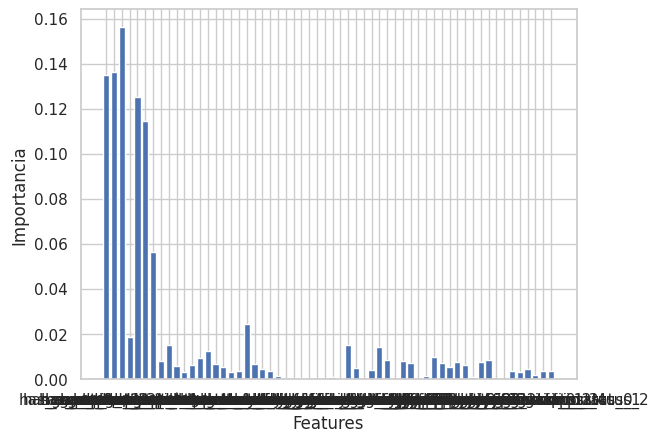

In [ ]:
feature_importances = gs.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
plt.bar(df.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.show()

In [ ]:
importances = [('',0)] * len(df.columns)
with Open("best_params.csv") as file:
  for i, feature in enumerate(df.columns):
    importances[i] = (feature, feature_importances[i])
    file.write(f"{feature},{feature_importance[i]}\n")
importances = sorted(importances,key=lambda tup:tup[1], reverse=True)
importances

[('geo_level_3_id', 0.15625625986201022),
 ('geo_level_2_id', 0.13645187521360747),
 ('geo_level_1_id', 0.134833298798972),
 ('age', 0.12538445535709947),
 ('area_percentage', 0.11471793550728833),
 ('height_percentage', 0.0562563522850491),
 ('count_families', 0.0245180707951331),
 ('count_floors_pre_eq', 0.01848377761939158),
 ('has_superstructure_mud_mortar_stone', 0.015109027805569742),
 ('land_surface_condition_1', 0.014984444324621515),
 ('foundation_type_2', 0.014392937021165222),
 ('has_superstructure_timber', 0.01233384643167089),
 ('ground_floor_type_2', 0.009998528244482587),
 ('has_superstructure_cement_mortar_brick', 0.009525598667109336),
 ('position_2', 0.008638283619773425),
 ('foundation_type_3', 0.008492394492444174),
 ('roof_type_1', 0.008067519934495646),
 ('has_superstructure_adobe_mud', 0.008042472661389799),
 ('position_1', 0.0077803011856359865),
 ('other_floor_type_1', 0.007560167448628034),
 ('roof_type_2', 0.0071556007676108575),
 ('ground_floor_type_3', 0.00

In [ ]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(df)
f1_score(train_labels, in_sample_preds, average='micro')

0.9842824854854739

In [ ]:
df_test_values = test_values.merge(categoricals_encoded_test, right_index=True, left_index=True)

In [ ]:
predictions = gs.predict(df_test_values)

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.to_csv('submission.csv')

In [5]:
feature_importances_ordenado = [('geo_level_3_id', 0.15625625986201022),
 ('geo_level_2_id', 0.13645187521360747),
 ('geo_level_1_id', 0.134833298798972),
 ('age', 0.12538445535709947),
 ('area_percentage', 0.11471793550728833),
 ('height_percentage', 0.0562563522850491),
 ('count_families', 0.0245180707951331),
 ('count_floors_pre_eq', 0.01848377761939158),
 ('has_superstructure_mud_mortar_stone', 0.015109027805569742),
 ('land_surface_condition_1', 0.014984444324621515),
 ('foundation_type_2', 0.014392937021165222),
 ('has_superstructure_timber', 0.01233384643167089),
 ('ground_floor_type_2', 0.009998528244482587),
 ('has_superstructure_cement_mortar_brick', 0.009525598667109336),
 ('position_2', 0.008638283619773425),
 ('foundation_type_3', 0.008492394492444174),
 ('roof_type_1', 0.008067519934495646),
 ('has_superstructure_adobe_mud', 0.008042472661389799),
 ('position_1', 0.0077803011856359865),
 ('other_floor_type_1', 0.007560167448628034),
 ('roof_type_2', 0.0071556007676108575),
 ('ground_floor_type_3', 0.006998344399368306),
 ('has_secondary_use', 0.006850800536801064),
 ('has_superstructure_bamboo', 0.00674439190175175),
 ('other_floor_type_2', 0.006326451849586837),
 ('has_superstructure_mud_mortar_brick', 0.006102807529021976),
 ('has_superstructure_stone_flag', 0.005588282156912952),
 ('has_superstructure_rc_non_engineered', 0.005283460318078087),
 ('other_floor_type_0', 0.0052303424014888055),
 ('land_surface_condition_2', 0.004929671989823675),
 ('has_secondary_use_agriculture', 0.004437940268465415),
 ('plan_configuration_4', 0.004266816081502281),
 ('foundation_type_1', 0.004162078176312365),
 ('legal_ownership_status_1', 0.0036961612009950365),
 ('legal_ownership_status_2', 0.0035459945081213256),
 ('plan_configuration_2', 0.0035181504788762996),
 ('has_superstructure_other', 0.0034172768991346364),
 ('has_secondary_use_hotel', 0.003378203436692015),
 ('has_superstructure_rc_engineered', 0.0033302939978220453),
 ('has_superstructure_cement_mortar_stone', 0.0032408868038969717),
 ('plan_configuration_3', 0.0029592552743615244),
 ('legal_ownership_status_0', 0.0015909651174304572),
 ('has_secondary_use_rental', 0.001270389852167329),
 ('ground_floor_type_1', 0.0011782289038655656),
 ('has_secondary_use_other', 0.0010695263027474188),
 ('position_0', 0.0008725970731785229),
 ('has_secondary_use_industry', 0.00033314731831775253),
 ('plan_configuration_1', 0.0002380264497616878),
 ('has_secondary_use_institution', 0.00023134813680435873),
 ('has_secondary_use_school', 0.00010742454186749236),
 ('has_secondary_use_health_post', 5.131269948023454e-05),
 ('has_secondary_use_gov_office', 3.416521359537847e-05),
 ('has_secondary_use_use_police', 3.21101386220889e-05),
 ('land_surface_condition_0', 0.0),
 ('foundation_type_0', 0.0),
 ('roof_type_0', 0.0),
 ('ground_floor_type_0', 0.0),
 ('plan_configuration_0', 0.0)]

In [69]:
feature_importances_ordenado = sorted(feature_importances_ordenado,key=lambda tup:-tup[1], reverse=True)
ejeX = []
ejeY = []

for feature in feature_importances_ordenado:
  ejeX.append(feature[0])
  ejeY.append(feature[1]*100)

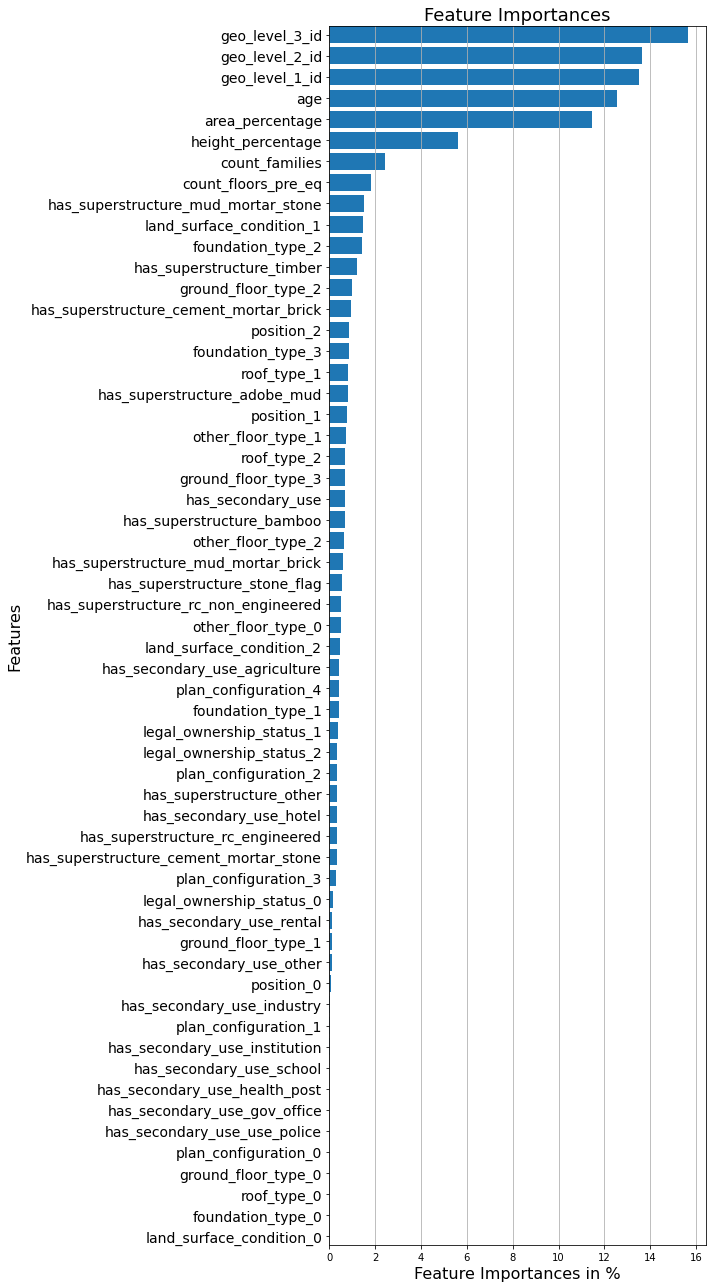

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,18))
plt.barh(ejeX,ejeY)
plt.title('Feature Importances', fontdict= {'fontsize': 18})
plt.xlabel('Feature Importances in %',fontdict= {'fontsize': 16})
plt.ylabel('Features',fontdict= {'fontsize': 16})
ax = plt.gca()
ax.grid(axis='x')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.margins(y=0)
plt.tight_layout()
plt.savefig("feature_importances.pdf")
plt.show()